In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [69]:

df = pd.read_csv('processed_ml_dataset.csv')
print('Dimension of dataset= ', df.shape)
df.head() # To get first n rows from the dataset default value of n is 5

Dimension of dataset=  (1105, 7)


,Type,Lat,Lon,Floor Size(SQFT),Number of Rooms,Number of Bathroom,Amount(BDT)
0,1,24.782145,80.415916,398,4,6,80000
1,1,23.874777,90.388188,900,2,2,19000
2,1,23.874777,90.388188,900,2,2,19000
3,1,23.871732,90.397145,1610,3,4,50000
4,1,23.874777,90.388188,950,2,2,20000


In [70]:
X = df.values[:, 0:6]  # get input values from first two columns
y = df.values[:, 6]  # get output values from last coulmn
m = len(y) # Number of training examples

print('Total no of training examples (m) = %s \n' %(m))

# Show only first 5 records
for i in range(5):
    print('X =', X[i, ], ', y =', y[i])

Total no of training examples (m) = 1105 

X = [  1.        24.782145  80.415916 398.         4.         6.      ] , y = 80000.0
X = [  1.        23.874777  90.388188 900.         2.         2.      ] , y = 19000.0
X = [  1.        23.874777  90.388188 900.         2.         2.      ] , y = 19000.0
X = [1.0000000e+00 2.3871732e+01 9.0397145e+01 1.6100000e+03 3.0000000e+00
 4.0000000e+00] , y = 50000.0
X = [  1.        23.874777  90.388188 950.         2.         2.      ] , y = 20000.0


In [71]:
from sklearn.model_selection import train_test_split
seed = 77
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=seed)

In [72]:
model_ols =  linear_model.LinearRegression(normalize=True)
model_ols.fit(X_train,y_train)
#model_ols.fit(X,y)
# fit() method is used for training the model
# Note the first parameter(feature) is must be 2D array(feature matrix)


D:\Projects\House_rent_prediction\venv\Scripts\env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [73]:
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [74]:
coef = model_ols.coef_
intercept = model_ols.intercept_
print('coef= ', coef)
print('intercept= ', intercept)


coef=  [     0.         -40958.82754695 -22561.16366928     72.06571603
   6955.84369752 -23734.18189541]
intercept=  2993755.7058388614


In [75]:
predicted_rent = pd.DataFrame(model_ols.predict(X_test), columns=['Predicted Price'])
actual_rent = pd.DataFrame(y_test)
print(predicted_rent)
print(actual_rent)

     Predicted Price
0      116814.497996
1       94241.481127
2       24995.746056
3       31097.513357
4      142322.287359
..               ...
106      4096.197967
107     17750.313843
108      5537.512287
109     22561.976550
110    110115.823579

[111 rows x 1 columns]
            0
0    100000.0
1     75000.0
2     35000.0
3     20000.0
4    200000.0
..        ...
106   12500.0
107   35000.0
108   10000.0
109   20000.0
110   65000.0

[111 rows x 1 columns]


In [76]:
predictedPrice = pd.DataFrame(model_ols.predict(X_test), columns=['Predicted Price']) # Create new dataframe of column'Predicted Price'
actualPrice = pd.DataFrame(y_test, columns=['Actual Price'])
actualPrice = actualPrice.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualPrice,predictedPrice],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
Actual Price,100000.000000,75000.000000,35000.000000,20000.000000,200000.000000,104000.000000,20000.000000,28000.000000,11000.000000,15000.00000,...,23000.000000,25000.000000,405000.000000,75000.000000,30000.000000,12500.000000,35000.000000,10000.000000,20000.00000,65000.000000
Predicted Price,116814.497996,94241.481127,24995.746056,31097.513357,142322.287359,63300.727628,29616.506079,22899.251616,-6259.665924,14935.52102,...,59292.345566,30869.569193,620860.757545,94241.481127,13082.018249,4096.197967,17750.313843,5537.512287,22561.97655,110115.823579


Text(0.5, 1.0, 'Price From Dataset Vs Price Predicted By Model')

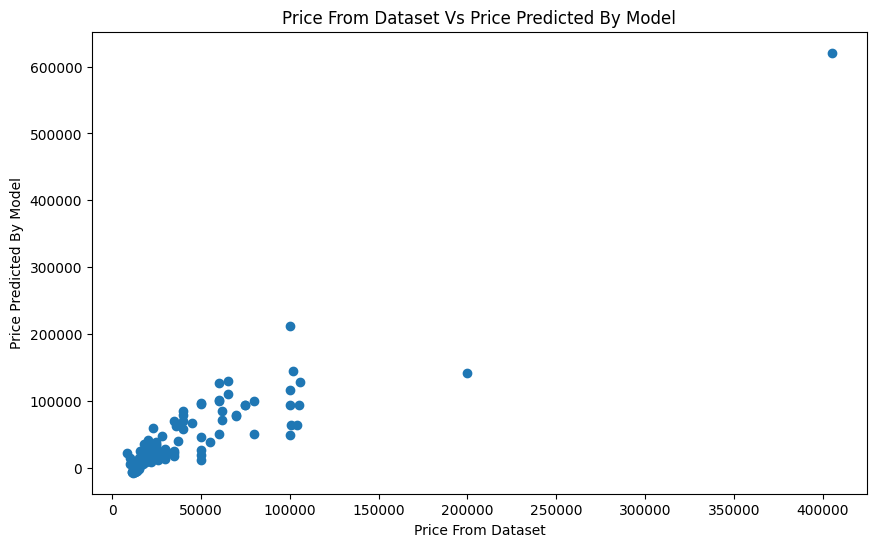

In [77]:
plt.scatter(y_test, model_ols.predict(X_test))
plt.xlabel('Price From Dataset')
plt.ylabel('Price Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Price From Dataset Vs Price Predicted By Model")

In [78]:
import sklearn.metrics as sm
y_test_pred = model_ols.predict(X_test)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))
#print(model_ols.predict(X_test))

Mean absolute error = 19136.61
Mean squared error = 1005465705.8
Median absolute error = 11863.62
Explain variance score = 0.54
R2 score = 0.53
[ 1.16814498e+05  9.42414811e+04  2.49957461e+04  3.10975134e+04
  1.42322287e+05  6.33007276e+04  2.96165061e+04  2.28992516e+04
 -6.25966592e+03  1.49355210e+04  2.05715228e+04  1.06525732e+04
  1.75168262e+04  2.13627046e+04  8.41215888e+03  5.25995978e+03
 -7.16512561e+03  2.52923376e+04  9.72581639e+04 -1.57019237e+03
  3.94088893e+04  1.93633451e+04  1.84893743e+04  3.78702852e+04
  4.93200362e+04 -6.98592623e+03  8.43849258e+04  1.63373770e+04
  2.24099345e+04  8.41394681e+04  5.70962615e+04  8.14883334e+03
  3.31767822e+04  1.07158894e+04  1.26099970e+05  1.37813818e+04
  9.30328117e+04  1.67599399e+04  7.84164450e+04  4.64788851e+04
  2.25169670e+04  1.45119934e+05  1.38712302e+04  2.18207535e+04
 -5.50832704e+03  2.79207485e+03  1.29225256e+05  1.07610024e+04
  5.10020515e+04  4.68245609e+04  9.91036008e+04  1.27909144e+05
  2.0653273

In [79]:
# test model with a random feature list
feature_to_predict = [[2.00000000e+00, 2.47821450e+01, 8.04159160e+01, 3.98000000e+03,
  4.00000000e+00, 6.00000000e+00]]
print("Feature to predict: ", feature_to_predict)
print("predicted value: ",model_ols.predict(feature_to_predict))

Feature to predict:  [[2.0, 24.782145, 80.415916, 3980.0, 4.0, 6.0]]
predicted value:  [336671.29327873]


In [80]:
df = pd.read_csv('test_ml_dataset.csv')
print('Dimension of dataset= ', df.shape)
df.head() # To get first n rows from the dataset default value of n is 5

Dimension of dataset=  (100, 7)


,Type,Lat,Lon,Floor Size(SQFT),Number of Rooms,Number of Bathroom,Amount(BDT)
0,1,23.874777,90.388188,900,2,2,19000
1,1,23.874777,90.388188,900,2,2,19000
2,1,23.871732,90.397145,1610,3,4,50000
3,1,23.874777,90.388188,950,2,2,20000
4,1,23.822702,90.442058,1250,3,3,20000


In [81]:
x = df.values[:, 0:6]  # get input values from first two columns
y = df.values[:, 6]  # get output values from last coulmn
predictedRent = pd.DataFrame(model_ols.predict(x), columns=['Predicted Rent']) # Create new dataframe of column'Predicted Price'
actualRent = pd.DataFrame(y, columns=['Actual Rent'])
actualRent = actualRent.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted_rent = pd.concat([actualRent,predictedRent],axis =1)
df_actual_vs_predicted_rent.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Actual Rent,19000.00000,19000.00000,50000.000000,20000.000000,20000.000000,30000.000000,40000.000000,24000.000000,30000.000000,11000.000000,...,30000.000000,50000.000000,30000.000000,19000.000000,30000.000000,15000.000000,35000.000000,25000.000000,25000.000000,50000.000000
Predicted Rent,7912.59677,7912.59677,18489.374347,11515.882572,17274.820241,54301.360776,18174.122767,42401.877209,48786.831399,4441.948023,...,56092.569805,16521.327967,86905.739098,20780.017813,29701.504926,8611.115639,21362.704579,27294.168533,34373.688192,46478.885132
